In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
# path to dataframes
path_to_dfs = "data/BLAR_implementation/Block_0303/forecasted_counts/"

In [3]:
# os.listdir(path_to_dfs)

In [4]:
len(os.listdir(path_to_dfs))

6370

In [5]:
6370/910

7.0

In [6]:
# seems each sub-window sequence have 7 things stored - what are all these?

# the forecasted npy files
# ar_sigma
# noise_sigma
# betas
# rho
# averaged forecasts
# posterior parameter summaries - might need to pay a little attention here, the r_hat values are too high - think this should vary around 1? - but almost all the values are greater than 2.

In [7]:
averaged_forecasts_csvs = []
for file in os.listdir(path_to_dfs):
    if file[:8] =='averaged':
        averaged_forecasts_csvs.append(file)

In [8]:
# how many csv files do we have?
len(averaged_forecasts_csvs)

910

In [9]:
# averaged_forecasts_csvs - we probably need these in order for getting the respective predicted values

In [10]:
averaged_forecasts_csvs[0]

'averaged_forecasts_sub_653.csv'

In [11]:
# sorting them would not work as everything in the nomenclature of the files is a character - hence will not respect the numerical order

In [12]:
# let's create these names in the order of the subwindows
ordered_csv_files = ['averaged_forecasts_sub_' + str(i) + '.csv' for i in range(910)]

In [13]:
# ordered_csv_files

In [14]:
# averaged_forecasts_csvs list is pointless at this time?

In [15]:
%%time
all_dfs = []
for file in ordered_csv_files:
    read_df = pd.read_csv(path_to_dfs + '/' + file)
    all_dfs.append(read_df)

CPU times: user 483 ms, sys: 12.2 ms, total: 495 ms
Wall time: 497 ms


In [16]:
# make a single dataframe out of the many
combined_df = pd.concat(all_dfs, axis = 1)

In [17]:
combined_df.head()

,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,...,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value,True_value,Forecasted_value
0,1.676954e-07,0.058860,3.197090e-07,0.092983,0.0,-0.006539,0.0,-0.015019,0.0,-0.014308,...,0.0,-0.005259,0.000001,-0.012214,0.000004,-0.021722,0.000000,0.058780,0.00000,-0.005636
1,2.699901e-05,0.054616,3.494233e-06,0.090213,0.0,0.004936,0.0,-0.011147,0.0,-0.020334,...,0.0,-0.009821,0.000000,-0.016946,0.000000,-0.003508,0.000000,0.008588,0.00000,-0.005234
2,1.515700e-04,0.063526,3.497421e-06,0.116874,0.0,0.004189,0.0,-0.009384,0.0,-0.014389,...,0.0,0.000697,0.000000,-0.011532,0.000000,-0.012429,0.000000,0.001048,0.00000,-0.006533
3,0.000000e+00,0.045173,0.000000e+00,0.070591,0.0,-0.004705,0.0,-0.009427,0.0,-0.004497,...,0.0,0.006897,0.000000,-0.005730,0.000000,-0.007305,0.000000,0.038403,0.00000,-0.004317
4,0.000000e+00,0.025561,0.000000e+00,0.014707,0.0,-0.009816,0.0,-0.008947,0.0,-0.005424,...,0.0,0.009345,0.000000,-0.001114,0.000000,-0.008729,0.087969,0.028426,0.02528,-0.001285


In [18]:
combined_df.shape

(7, 1820)

In [19]:
# get the true values
True_values_df = combined_df[['True_value']]

In [20]:
True_values_df.head()

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197090e-07,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000001,0.000004,0.000000,0.00000
1,2.699901e-05,3.494233e-06,0.0,0.0,0.0,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
2,1.515700e-04,3.497421e-06,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
3,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000029,0.654502,0.021100,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000
4,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.087969,0.02528


In [21]:
True_values_df.shape

(7, 910)

In [22]:
# get the proper counts?
exp_true = np.exp(True_values_df)-1

In [23]:
exp_true

,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,...,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value,True_value
0,1.676954e-07,3.197091e-07,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000001,0.000004,0.000000,0.000000
1,2.699937e-05,3.494239e-06,0.0,0.000000e+00,0.000000,0.000000,0.000078,0.000078,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
2,1.515815e-04,3.497427e-06,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000029,0.924184,0.021324,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.091955,0.025602
5,0.000000e+00,0.000000e+00,0.0,3.197091e-07,0.580778,0.075164,0.000000,0.000000,0.0,0.0,...,0.0,0.0,5.677395e-07,0.000004,2.414957e-12,0.0,0.000000,0.000000,0.000000,0.000000
6,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.179532,0.476410,0.000000,0.0,0.0,...,0.0,0.0,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000


In [24]:
# sum the true values - since the sub images are not overlapping, we can get the sum across columns in the above dataframe
sum_true_values = exp_true.sum(axis = 1)

In [25]:
sum_true_values

0    49.000171
1    46.000007
2    42.999983
3    38.999993
4    36.025885
5    36.000000
6    23.000000
dtype: float64

In [26]:
# get the forecasted values
Forecasted_values_df = combined_df[['Forecasted_value']]

In [27]:
Forecasted_values_df.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.058860,0.092983,-0.006539,-0.015019,-0.014308,-0.002579,0.035343,0.038368,0.050802,-0.004955,...,-0.007189,-0.005670,-0.001301,0.017092,-0.011707,-0.005259,-0.012214,-0.021722,0.058780,-0.005636
1,0.054616,0.090213,0.004936,-0.011147,-0.020334,-0.004608,0.044637,0.014050,0.075036,-0.000688,...,-0.011763,-0.009912,-0.009435,-0.003846,-0.006927,-0.009821,-0.016946,-0.003508,0.008588,-0.005234
2,0.063526,0.116874,0.004189,-0.009384,-0.014389,-0.004058,0.032398,0.023997,0.072848,-0.002941,...,-0.005614,-0.005767,-0.010256,0.003531,-0.008438,0.000697,-0.011532,-0.012429,0.001048,-0.006533
3,0.045173,0.070591,-0.004705,-0.009427,-0.004497,0.003352,0.029348,0.032262,0.052902,0.008536,...,0.009398,0.009778,-0.009252,0.023051,0.006018,0.006897,-0.005730,-0.007305,0.038403,-0.004317
4,0.025561,0.014707,-0.009816,-0.008947,-0.005424,-0.002382,0.017887,0.021164,0.038526,-0.005492,...,0.000404,-0.000133,-0.009075,0.007355,-0.000793,0.009345,-0.001114,-0.008729,0.028426,-0.001285


In [28]:
exp_forecasted = np.exp(Forecasted_values_df)-1

In [29]:
exp_forecasted

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.060627,0.097443,-0.006518,-0.014907,-0.014206,-0.002575,0.035975,0.039113,0.052114,-0.004943,...,-0.007163,-0.005654,-0.001300,0.017239,-0.011639,-0.005245,-0.012140,-0.021488,0.060541,-0.005620
1,0.056135,0.094408,0.004949,-0.011085,-0.020128,-0.004598,0.045648,0.014149,0.077923,-0.000688,...,-0.011694,-0.009863,-0.009391,-0.003839,-0.006903,-0.009773,-0.016803,-0.003502,0.008625,-0.005221
2,0.065587,0.123978,0.004198,-0.009340,-0.014286,-0.004049,0.032929,0.024287,0.075567,-0.002937,...,-0.005598,-0.005750,-0.010204,0.003537,-0.008403,0.000697,-0.011465,-0.012352,0.001048,-0.006512
3,0.046209,0.073142,-0.004694,-0.009383,-0.004487,0.003358,0.029783,0.032788,0.054326,0.008572,...,0.009443,0.009826,-0.009210,0.023319,0.006036,0.006921,-0.005713,-0.007279,0.039150,-0.004307
4,0.025890,0.014815,-0.009768,-0.008907,-0.005409,-0.002379,0.018047,0.021390,0.039278,-0.005477,...,0.000404,-0.000133,-0.009034,0.007382,-0.000793,0.009389,-0.001113,-0.008691,0.028833,-0.001285
5,0.049962,0.109012,-0.012570,0.002946,-0.002689,0.003619,0.035852,0.016117,0.065162,0.005068,...,0.007165,-0.000281,0.002762,0.010340,0.005678,0.009232,-0.006227,-0.006474,0.014423,-0.001331
6,0.046229,0.110465,-0.017785,-0.003955,-0.007256,0.001394,0.021688,0.005388,0.068052,0.000010,...,-0.000376,-0.003909,-0.006676,0.001835,0.003097,0.009811,-0.001258,-0.014275,0.015440,-0.003884


In [30]:
# set the values to 0 if the forecasted count is negative?

In [31]:
exp_forecasted[exp_forecasted < 0] = 0

In [32]:
exp_forecasted.head()

,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,...,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value,Forecasted_value
0,0.060627,0.097443,0.000000,0.0,0.0,0.000000,0.035975,0.039113,0.052114,0.000000,...,0.000000,0.000000,0.0,0.017239,0.000000,0.000000,0.0,0.0,0.060541,0.0
1,0.056135,0.094408,0.004949,0.0,0.0,0.000000,0.045648,0.014149,0.077923,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.008625,0.0
2,0.065587,0.123978,0.004198,0.0,0.0,0.000000,0.032929,0.024287,0.075567,0.000000,...,0.000000,0.000000,0.0,0.003537,0.000000,0.000697,0.0,0.0,0.001048,0.0
3,0.046209,0.073142,0.000000,0.0,0.0,0.003358,0.029783,0.032788,0.054326,0.008572,...,0.009443,0.009826,0.0,0.023319,0.006036,0.006921,0.0,0.0,0.039150,0.0
4,0.025890,0.014815,0.000000,0.0,0.0,0.000000,0.018047,0.021390,0.039278,0.000000,...,0.000404,0.000000,0.0,0.007382,0.000000,0.009389,0.0,0.0,0.028833,0.0


In [33]:
sum_forecasted_values = exp_forecasted.sum(axis = 1)

In [34]:
sum_forecasted_values

0    28.548427
1    30.070154
2    32.664055
3    26.517632
4    22.795690
5    29.441529
6    26.397361
dtype: float64

In [35]:
# concatenate the sum dataframes
block_0303_true_and_forecasted_values_df = pd.concat((sum_true_values, sum_forecasted_values), axis = 1)

In [36]:
block_0303_true_and_forecasted_values_df.columns = ["True_count", "Forecasted_count"]

In [37]:
block_0303_true_and_forecasted_values_df

,True_count,Forecasted_count
0,49.000171,28.548427
1,46.000007,30.070154
2,42.999983,32.664055
3,38.999993,26.517632
4,36.025885,22.795690
5,36.000000,29.441529
6,23.000000,26.397361


In [38]:
# blockwise mean squared error
rmse = np.sqrt(mean_squared_error(sum_true_values, sum_forecasted_values))
rmse

12.896668730914742

In [39]:
# blockwise mean absolute error
mae = mean_absolute_error(sum_true_values, sum_forecasted_values)
mae

11.769416201963399

In [40]:
corr = pearsonr(sum_true_values, sum_forecasted_values)
corr

PearsonRResult(statistic=0.46434388614612415, pvalue=0.2938654990949901)

In [41]:
r2 = r2_score(sum_true_values, sum_forecasted_values)
r2

-1.6538256604989159

##### Coverages and widths for the forecasted values?

In [42]:
# for this we need the all_forecasts npy files

In [43]:
# content location is the same path as above

In [44]:
all_forecasts_npy_files = ['all_forecasts_sub_' + str(i) + '.npy' for i in range(910)]

In [45]:
# all_forecasts_npy_files

In [46]:
# load the npy files

In [47]:
%%time
loaded_npy_files = []
for file in all_forecasts_npy_files:
    joined_path = os.path.join(path_to_dfs, file)
    load_file = np.load(joined_path)
    # notice we are averaging the preds across the chains before exponentiation
    mean_file = np.exp(np.mean(load_file, axis = 1)) - 1
    loaded_npy_files.append(mean_file)

CPU times: user 285 ms, sys: 54.5 ms, total: 339 ms
Wall time: 341 ms


In [48]:
len(loaded_npy_files)

910

In [49]:
loaded_npy_files[0].shape

(1000, 7)

In [50]:
loaded_npy_files[0]

array([[ 0.05036592,  0.06007195, -0.02029973, ...,  0.06387424,
         0.16223657,  0.3496107 ],
       [ 0.01663446,  0.0471046 ,  0.05481458, ...,  0.05247152,
        -0.0522595 ,  0.10185099],
       [-0.03021371, -0.00114805,  0.13588464, ..., -0.13302153,
        -0.00639081,  0.07431591],
       ...,
       [ 0.04781938,  0.00088286,  0.18810058, ..., -0.04671836,
         0.12725925,  0.1162703 ],
       [-0.01095998,  0.09830081, -0.01850146, ..., -0.08506775,
        -0.09696454, -0.04966176],
       [-0.04713827,  0.18091547,  0.00814879, ...,  0.05910623,
        -0.06240427,  0.03611815]], dtype=float32)

In [51]:
%%time
# convert less than 0 entries to 0 for all arrays
for arr in loaded_npy_files:
    arr[arr < 0] = 0

CPU times: user 21.6 ms, sys: 387 µs, total: 22 ms
Wall time: 21.2 ms


In [52]:
loaded_npy_files[0]

array([[0.05036592, 0.06007195, 0.        , ..., 0.06387424, 0.16223657,
        0.3496107 ],
       [0.01663446, 0.0471046 , 0.05481458, ..., 0.05247152, 0.        ,
        0.10185099],
       [0.        , 0.        , 0.13588464, ..., 0.        , 0.        ,
        0.07431591],
       ...,
       [0.04781938, 0.00088286, 0.18810058, ..., 0.        , 0.12725925,
        0.1162703 ],
       [0.        , 0.09830081, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.18091547, 0.00814879, ..., 0.05910623, 0.        ,
        0.03611815]], dtype=float32)

In [53]:
# Since we do not have overlapping sub-windows, we can sum the counts to get the final densities
output = sum(loaded_npy_files)

In [54]:
output.shape

(1000, 7)

In [55]:
output

array([[41.887875, 37.591854, 41.34084 , ..., 31.044338, 31.4644  ,
        29.088406],
       [33.11368 , 30.520773, 36.679913, ..., 25.038378, 37.210457,
        37.972076],
       [40.8266  , 37.38029 , 40.950558, ..., 31.464483, 39.518734,
        35.883865],
       ...,
       [34.35221 , 37.634117, 42.051853, ..., 39.16575 , 42.027534,
        46.028595],
       [39.08241 , 37.355553, 48.81173 , ..., 47.233604, 46.369965,
        41.535286],
       [34.78288 , 40.39996 , 48.24418 , ..., 39.531143, 46.441826,
        44.33457 ]], dtype=float32)

In [56]:
# is this sum correct? alternative method of computing the sums
output_alt = np.sum(loaded_npy_files, axis = 0)

In [57]:
output_alt.shape

(1000, 7)

In [58]:
output_alt

array([[41.887875, 37.591854, 41.34084 , ..., 31.044338, 31.4644  ,
        29.088406],
       [33.11368 , 30.520773, 36.679913, ..., 25.038378, 37.210457,
        37.972076],
       [40.8266  , 37.38029 , 40.950558, ..., 31.464483, 39.518734,
        35.883865],
       ...,
       [34.35221 , 37.634117, 42.051853, ..., 39.16575 , 42.027534,
        46.028595],
       [39.08241 , 37.355553, 48.81173 , ..., 47.233604, 46.369965,
        41.535286],
       [34.78288 , 40.39996 , 48.24418 , ..., 39.531143, 46.441826,
        44.33457 ]], dtype=float32)

In [59]:
np.mean(output_alt == output)

1.0

In [60]:
# verified the sum is correct, let's get the widths and the coverages - and also any essential plots

In [61]:
# now we can get the 2.5th abd the 97.5th percentiles - to get the coverage and the widths of the CIS
li_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[0,:].reshape(-1,1)    
ui_train = np.percentile(output, axis = 0, q = (2.5, 97.5))[1,:].reshape(-1,1)

In [62]:
li_train

array([[25.10149899],
       [25.59461761],
       [25.85227118],
       [22.44229727],
       [20.57850618],
       [24.2786932 ],
       [23.49193025]])

In [63]:
ui_train

array([[46.47285423],
       [46.21793108],
       [49.54896574],
       [45.50323544],
       [42.73424101],
       [48.40914936],
       [45.68003674]])

In [64]:
width_train = ui_train - li_train
avg_width_train = width_train.mean(0)[0]

In [65]:
avg_width_train

22.46094270433698

In [66]:
y_traina = block_0303_true_and_forecasted_values_df[["True_count"]].values

In [67]:
y_traina

array([[49.00017137],
       [46.00000671],
       [42.99998287],
       [38.99999281],
       [36.02588457],
       [36.00000019],
       [22.99999976]])

In [68]:
ind_train = (y_traina >= li_train) & (y_traina <= ui_train)
coverage_train= ind_train.mean(0)[0]

In [69]:
coverage_train

0.7142857142857143

In [70]:
np.mean(output, axis = 0)

array([34.9136  , 35.400986, 37.60032 , 33.406986, 30.20285 , 35.454716,
       33.23756 ], dtype=float32)

In [71]:
sum_forecasted_values

0    28.548427
1    30.070154
2    32.664055
3    26.517632
4    22.795690
5    29.441529
6    26.397361
dtype: float64

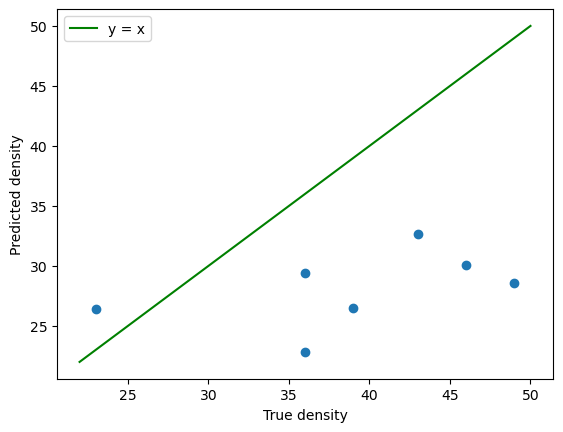

In [72]:
plt.scatter(block_0303_true_and_forecasted_values_df['True_count'], block_0303_true_and_forecasted_values_df['Forecasted_count'])
plt.xlabel("True density")
plt.ylabel("Predicted density")
# Add the y = x line
plt.plot([22, 50], [22, 50], color='green', label='y = x')
plt.legend()
plt.show()

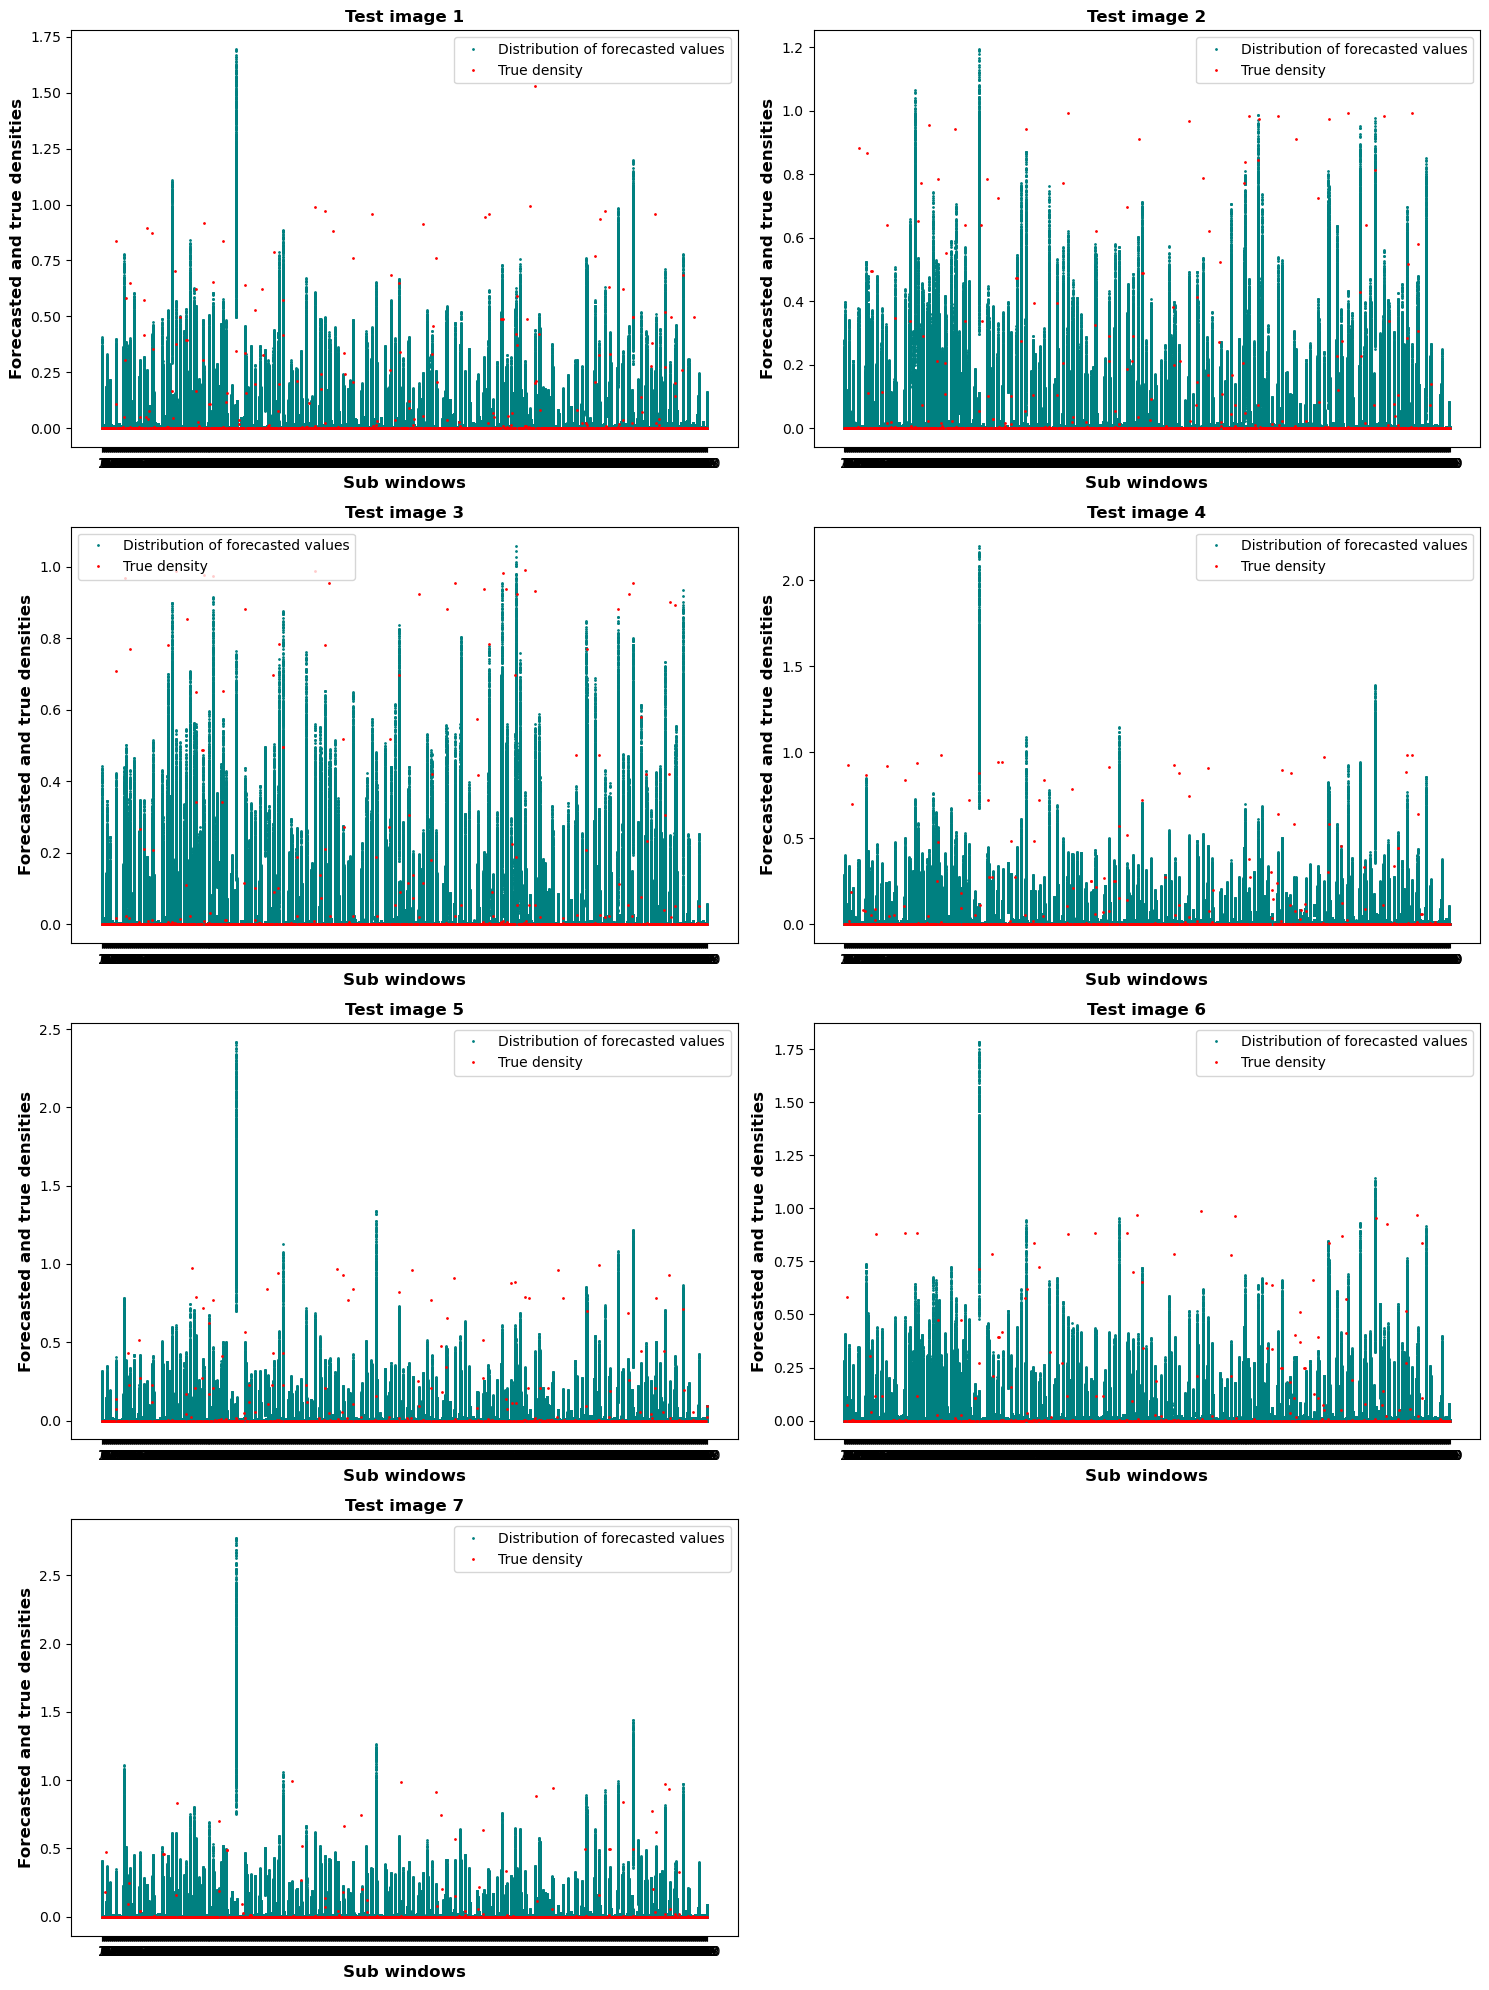

CPU times: user 27.7 s, sys: 828 ms, total: 28.6 s
Wall time: 28.2 s


In [73]:
%%time
# Create a 2x4 grid of subplots (total 8 plots, the last one will be left empty)
fig, axes = plt.subplots(4, 2, figsize=(15,20))
axes = axes.flatten() 

# widths plots
for i in range(7):
    timestep_i_subwindows = []
    for y, file in enumerate(loaded_npy_files):
        t_i_forecast = file[:,i]
        # print the shape of the extracted array
        # print(t_i_forecast.shape)
        timestep_i_subwindows.append(t_i_forecast)
    stacked_forecasts = np.stack(timestep_i_subwindows)
    stacked_forecasts[stacked_forecasts<0] = 0
    sorted_stacked_forecasts = np.sort(stacked_forecasts, axis = 1)
    # get the values between the 2.5th and 97.5th percentile?
    sorted_interval_data = sorted_stacked_forecasts[:,25:975]

    # Plot for the current 2D array
    for l, row in enumerate(sorted_interval_data):
        axes[i].plot([l + 1] * len(row), row, 'o', markersize=1, color='teal', label='Distribution of forecasted values' if l == 0 else "")
    
    true_counts = exp_true.iloc[i,:].values

    # # Overlay the 1D array values
    axes[i].plot(np.arange(1, 911), true_counts, 'o', markersize=1, color='red', label='True density')
    
    # Customize x-ticks and labels
    axes[i].set_xticks(np.arange(1, 911))
    # axes[i].set_xticklabels([f'sub_window_{zz + 1}' for zz in range(910)], rotation=90, fontsize=13)
    axes[i].set_xlabel("Sub windows", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Forecasted and true densities", fontsize=12, fontweight='bold')
    axes[i].set_title(f"Test image {i + 1}", fontsize=12, fontweight='bold')
    axes[i].legend()


# Hide the last (empty) subplot
axes[-1].set_visible(False)

# Adjust layout
plt.tight_layout()

# # Save the figure as a PDF file
# plt.savefig("Previous_data/Forecasted_distributions_blk13.pdf", format='pdf', bbox_inches='tight')
plt.show()



In [74]:
# plots are going to be too over-crowded as we now have 910 subwindows - might beed to talk to Dr. Ghosh to figure out a better way to give these plots

In [75]:
# we may need to re-think about the way the average forecasts were computed. Maybe get the average after exponentiating than averaging all values to a single value and then exponentiating? this would be a few lines of codes - but may be a better way to get the forecated density values? 